<a href="https://colab.research.google.com/github/otwn/Geospatial-Analysis-Examples/blob/master/Milestone1_Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deliverable**<br>
The deliverable for Part 1 is a jupyter notebook showing an example image(s) of a satellite dataset read in using rasterio, and demonstration of a function that carries out a manipulation of that image using keras and Tensorflow 2.0. That manipulation could be anything that alters the image, such as its size, geometry (shape), pixel intensities, or spatial projection. This will mostly test your understanding of keras syntax, which is an essential component of the remaining Parts. You may find the tensorflow-image library helpful.

In [1]:
import os, glob
import matplotlib

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 3s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
img = x_train[0]

In [8]:
img.shape

(32, 32, 3)

In [9]:
img_array = tf.image.resize(
    img, (64,64), preserve_aspect_ratio=True, antialias=False, name=None
)

In [10]:
img_rotate = tf.image.rot90(img_array)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

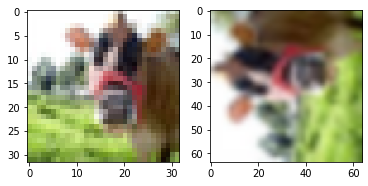

In [12]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_rotate.numpy().astype("uint8"), cmap="gray")

In [14]:
!pip install rasterio
import rasterio

     |████████████████████████████████| 19.3 MB 119 kB/s 


In [15]:
with rasterio.open("/content/drive/MyDrive/Jupyter/LiveProject/milestone/data/example_TCI_10m.jp2", driver="JP2OpenJPEG") as dataset:
  array = dataset.read(1)
  print(dataset.profile)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32719), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 8000020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'interleave': 'pixel'}


In [16]:
dataset.meta

{'count': 3,
 'crs': CRS.from_epsg(32719),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'height': 10980,
 'nodata': None,
 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 8000020.0),
 'width': 10980}